In [0]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [0]:
data = pd.read_csv("concrete_data.csv")
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                           1030 non-null float64
blast_furnace_slag               1030 non-null float64
fly_ash                          1030 non-null float64
water                            1030 non-null float64
superplasticizer                 1030 non-null float64
coarse_aggregate                 1030 non-null float64
fine_aggregate                   1030 non-null float64
age                              1030 non-null int64
concrete_compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [0]:
print("Number of rows    :",data.shape[0])
print("Number of columns :",data.shape[1])

Number of rows    : 1030
Number of columns : 9


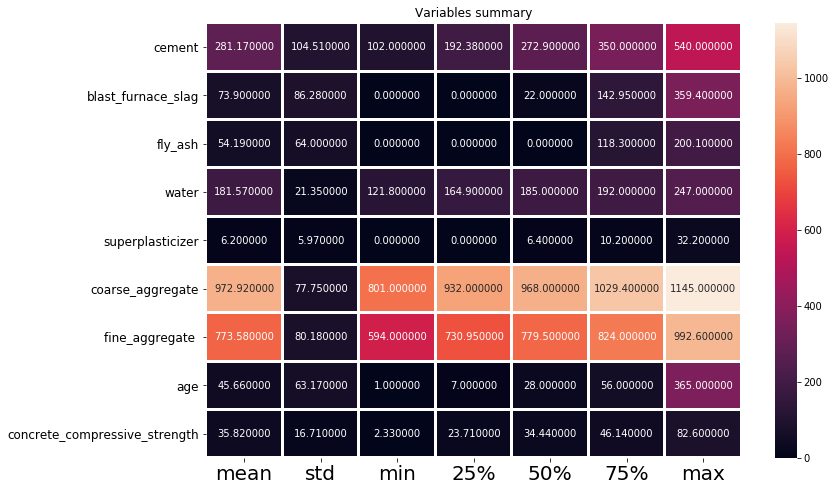

In [0]:
plt.figure(figsize=(12,8))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

In [0]:
#Splitting train and test data
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size =.3,random_state = 123)
train_X = train[[x for x in train.columns if x not in ["concrete_compressive_strength"]]]
train_Y = train["concrete_compressive_strength"]
test_X  = test[[x for x in test.columns if x not in ["concrete_compressive_strength"]]]
test_Y  = test["concrete_compressive_strength"]

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

reg_model=SGDRegressor(max_iter=5000,tol=1e-3,eta0=0.001,loss="huber",early_stopping=False)
reg_model.fit(train_X,train_Y)
y_pred=reg_model.predict(test_X)
print("R2 Score for the model", r2_score(test_Y,y_pred))
print("RSE Error for the model",np.sqrt((np.sum(np.square(test_Y-y_pred)))/1028))

R2 Score for the model 0.2077306937495943
RSE Error for the model 7.926793642037228


In [0]:
print("Weight of the parameters",reg_model.coef_)
print("Intercept",reg_model.intercept_)

Weight of the parameters [ 0.12081163  0.09397151  0.09050625 -0.20769372  0.09736793  0.0076872
  0.03035562  0.12773399]
Intercept [-0.00013036]
